# 1.4 Supervised Learning Algorithms Part 1

## 01 Load Libraries & Dataset
## 02 Filtering Weather Data for Model Training
## 03 Implementing KNN for Picnic Suitability Prediction
## 04 Evaluating Model Performance with a Multilabel Confusion Matrix

### 01 Load Libraires and Dataset

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [46]:
# Create a path for the import of dataset

path = r'C:\Users\wallm\02 2025 Machine Learning Project\02 Data'

In [48]:
# Import 'scaled' weather dataset

climate = pd.read_csv(os.path.join(path, '02 Prepared Data', 'Dataset-weather-prediction-dataset-scaled.csv'))

In [50]:
climate.head()

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [52]:
climate = climate.round(3)

In [54]:
climate = climate.drop(columns=['Unnamed: 0'])

In [82]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,-1.6,0.661,-0.028,0.826,-0.002,-1.101,-0.265,-0.179,-0.903,...,-0.444,0.762,-1.300,-0.806,-0.088,-0.025,0.372,-0.668,-0.520,-0.752
1,19600102,-1.6,0.245,-0.028,0.736,-0.002,-1.058,1.659,-0.179,-0.810,...,0.783,1.184,-1.262,-1.042,0.503,-0.025,-0.829,-0.548,-0.629,-0.407
2,19600103,-1.6,1.076,-0.028,1.278,-0.002,-1.251,0.156,-0.179,-1.065,...,0.783,1.184,-0.433,-1.136,-0.396,-0.025,-1.010,-0.067,0.054,-0.177
3,19600104,-1.6,-1.002,-0.028,1.458,-0.002,-0.822,-0.446,-0.179,-0.114,...,0.783,0.481,0.388,-1.183,0.669,-0.025,-1.040,-0.999,-0.164,-0.839
4,19600105,-1.6,0.245,-0.028,1.729,-0.002,-0.747,-0.165,-0.179,0.187,...,-1.670,-0.363,1.730,-0.795,-0.491,-0.025,0.673,-1.509,-1.340,-1.471


In [84]:
climate.to_csv(os.path.join(path, '02 Prepared data', 'Dataset-weather-prediction-dataset-scaled-formatted.csv'))

In [25]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 170 entries, DATE to VALENTIA_temp_max
dtypes: float64(169), int64(1)
memory usage: 29.8 MB


In [27]:
climate.shape

(22950, 170)

In [88]:
# Review all column names for missing columns

print(", ".join(climate.columns))

DATE, MONTH, BASEL_cloud_cover, BASEL_wind_speed, BASEL_humidity, BASEL_pressure, BASEL_global_radiation, BASEL_precipitation, BASEL_snow_depth, BASEL_sunshine, BASEL_temp_mean, BASEL_temp_min, BASEL_temp_max, BELGRADE_cloud_cover, BELGRADE_humidity, BELGRADE_pressure, BELGRADE_global_radiation, BELGRADE_precipitation, BELGRADE_sunshine, BELGRADE_temp_mean, BELGRADE_temp_min, BELGRADE_temp_max, BUDAPEST_cloud_cover, BUDAPEST_humidity, BUDAPEST_pressure, BUDAPEST_global_radiation, BUDAPEST_precipitation, BUDAPEST_sunshine, BUDAPEST_temp_mean, BUDAPEST_temp_min, BUDAPEST_temp_max, DEBILT_cloud_cover, DEBILT_wind_speed, DEBILT_humidity, DEBILT_pressure, DEBILT_global_radiation, DEBILT_precipitation, DEBILT_sunshine, DEBILT_temp_mean, DEBILT_temp_min, DEBILT_temp_max, DUSSELDORF_cloud_cover, DUSSELDORF_wind_speed, DUSSELDORF_humidity, DUSSELDORF_pressure, DUSSELDORF_global_radiation, DUSSELDORF_precipitation, DUSSELDORF_snow_depth, DUSSELDORF_sunshine, DUSSELDORF_temp_mean, DUSSELDORF_temp

In [38]:
# Import the 'Pleasant weather' dataset

pleasantweather = pd.read_csv(os.path.join(path, '01 Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [40]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
pleasantweather.shape

(22950, 16)

In [44]:
pleasantweather.columns

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

### 02 Filtering Weather Data for Model Training

##### Missing columns GDANSK, ROMA, & TOURS from climate dataset.

In [95]:
# Identify columns that contain 'temp_' but exclude unwanted stations

temp_cols = [col for col in climate.columns if 'temp_' in col and not any(station in col for station in ['GDANSK', 'ROMA', 'TOURS'])]

# Create the filtered DataFrame (without 'DATE' and 'MONTH')

df = climate[temp_cols].copy()

In [102]:
df.head()

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-0.529,-0.846,-0.478,-1.017,-1.220,-0.949,-1.099,-1.119,-1.137,-0.114,...,-0.475,-0.124,-0.170,-0.063,-0.391,-0.290,-0.640,-0.668,-0.520,-0.752
1,-0.583,-0.462,-0.570,-1.108,-0.819,-1.298,-1.111,-0.879,-1.341,-0.368,...,-0.583,-0.651,-0.456,-0.840,-0.416,-0.184,-0.629,-0.548,-0.629,-0.407
2,-0.257,-0.187,-0.593,-1.085,-1.168,-1.099,-1.064,-0.839,-1.116,-0.510,...,-0.777,-0.651,-0.385,-0.898,-0.615,-0.411,-0.727,-0.067,0.054,-0.177
3,-0.556,-0.386,-0.513,-1.210,-1.363,-1.438,-1.146,-1.012,-1.208,-0.526,...,-0.583,-0.943,-0.800,-1.059,-0.764,-0.531,-0.925,-0.999,-0.164,-0.839
4,-1.004,-1.076,-1.040,-1.210,-1.013,-1.458,-1.087,-0.919,-1.116,-0.320,...,-0.583,-0.622,-0.671,-0.547,-0.503,-0.477,-0.705,-1.509,-1.340,-1.471


In [104]:
### Create an 'X' matrix (Date and month columns already dropped)

X = df.copy()

### Define y (target labels) - dropping 'DATE' from the pleasant weather dataset

y = pleasantweather.drop(columns=['DATE'])

In [106]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [112]:
#Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [110]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


### 03 Implementing KNN for Picnic Suitability Prediction

In [120]:
#Run the model with neighbors equal to 1 to 4, test the accuracy

k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

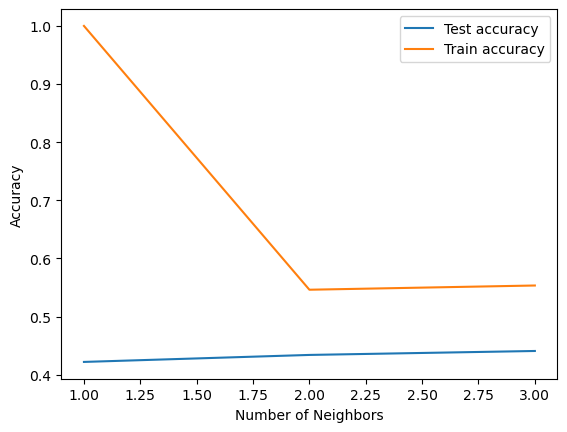

In [122]:
#plot the relationship between number of neighbors and accuracy

plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [124]:
# Define the save path

save_path = os.path.join(r'C:\Users\wallm\02 2025 Machine Learning Project\04 Analysis\01 Visualisations', 'knn_accuracy_plot.png')

# Save the plot

plt.savefig(save_path, dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

### 04 Evaluating Model Performance with a Multilabel Confusion Matrix

C:\Users\wallm\iCloudDrive\Python\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


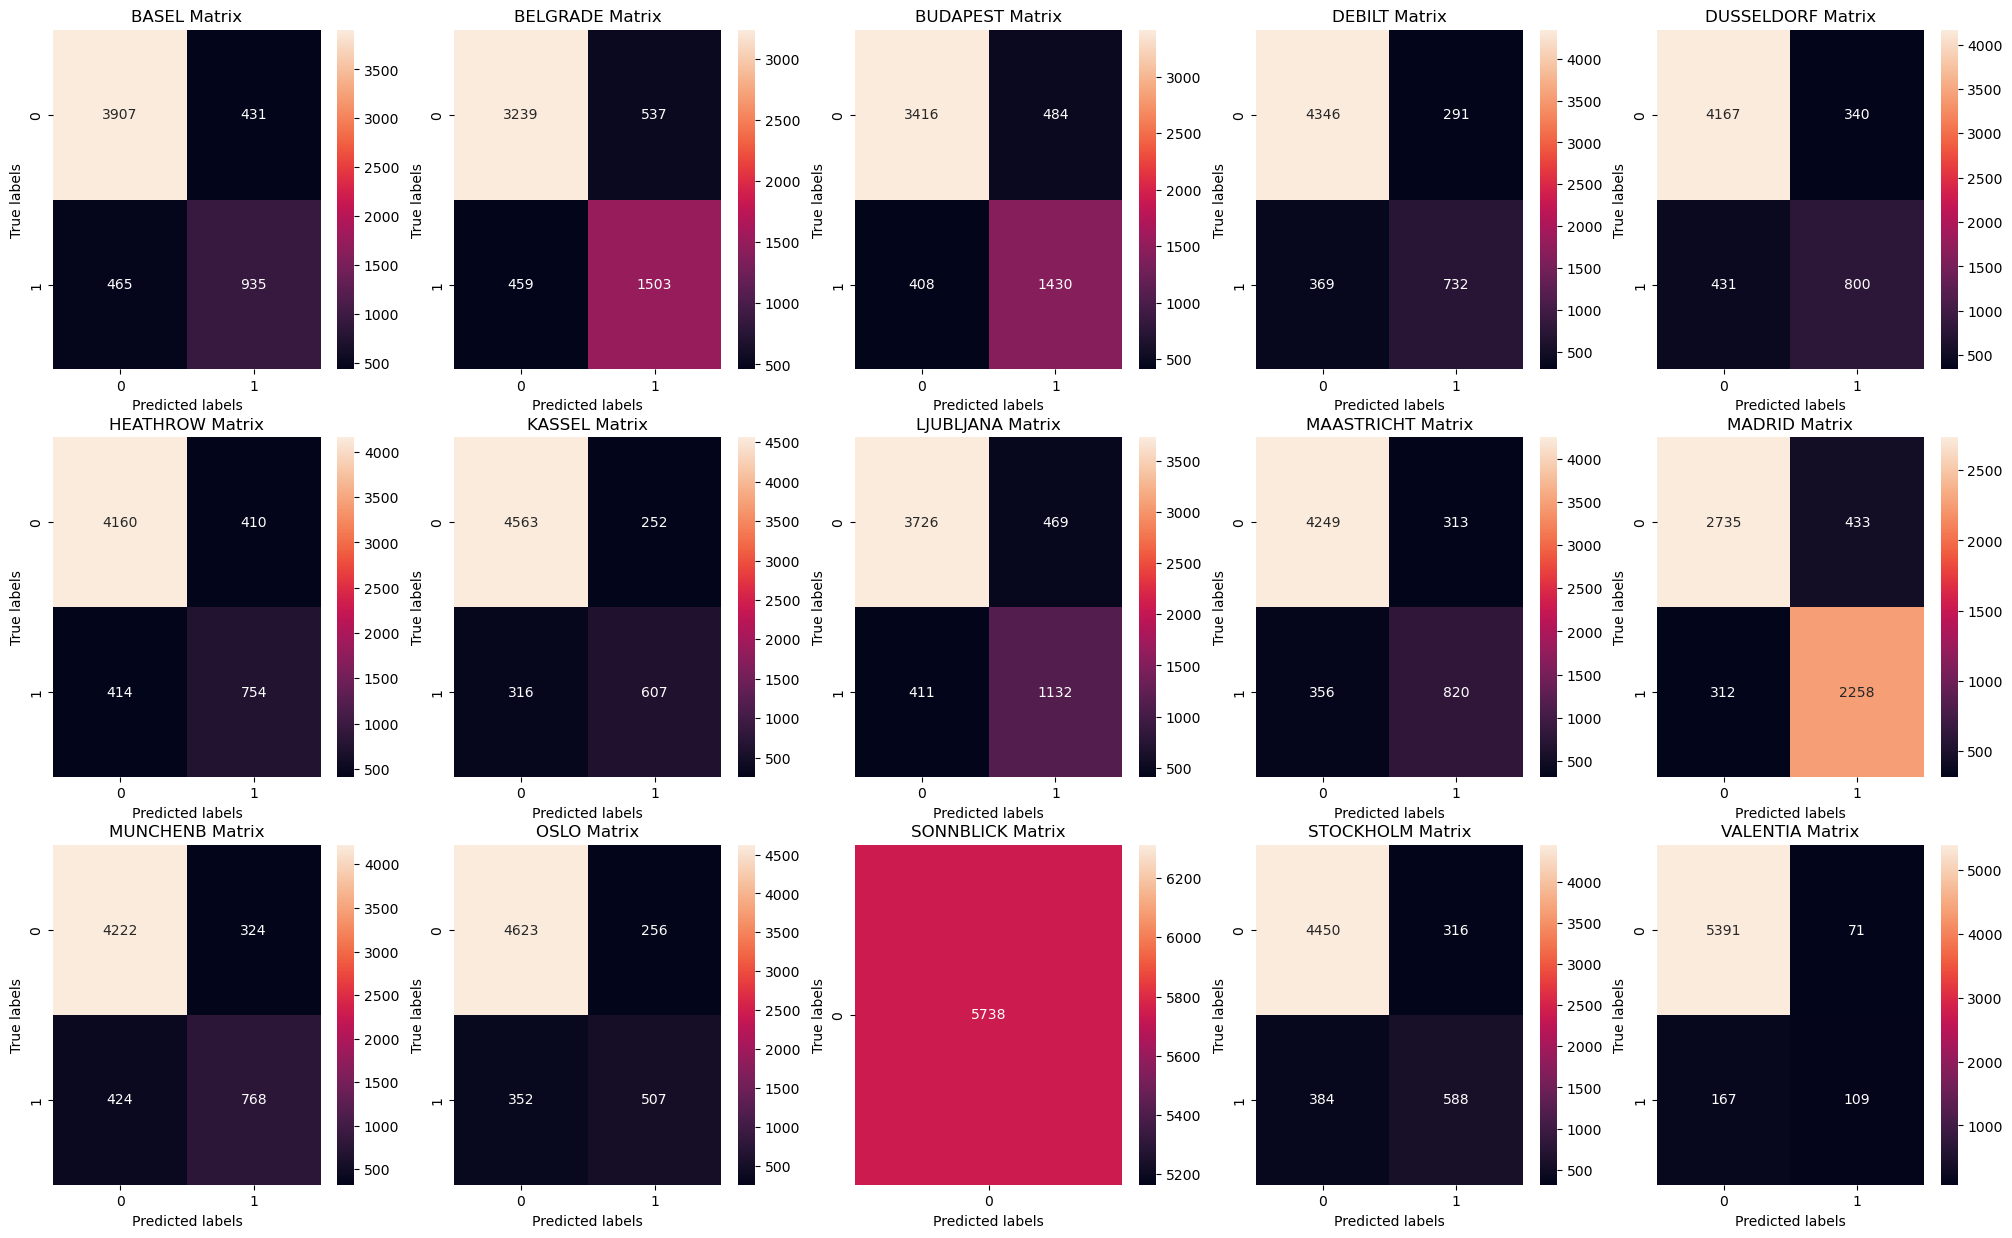

In [128]:
# use a multilabel confusion matrix, based on final k

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1